In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('TXF\TXF.txt', sep=",")
df['Datetime'] = df.Date + ' ' + df.Time
df.Datetime = pd.to_datetime(df.Datetime)
df = df.drop(['Date', 'Time'], axis=1)

In [3]:
prices = df[(df.Datetime.dt.year > 2017) & (df.Datetime.dt.hour > 7) & (df.Datetime.dt.hour < 14)]
prices = prices.set_index('Datetime')

In [4]:
five_min_k = pd.concat([prices['Open'].resample("5T").first().to_frame(), 
                        prices['Close'].resample("5T").last().to_frame()], axis=1)
five_min_k = five_min_k[(five_min_k.index.hour > 7) & (five_min_k.index.hour < 14)].dropna(how='all')

In [5]:
five_min_k['gap'] = five_min_k['Open'].shift(0) - five_min_k['Close'].shift(1)

In [15]:
five_min_k.head()

,Open,Close,gap
Datetime,,,
2018-01-02 08:45:00,10629.0,10636.0,NaN
2018-01-02 09:05:00,10649.0,10645.0,0.0
2018-01-02 09:45:00,10655.0,10659.0,0.0
2018-01-03 08:45:00,10748.0,10739.0,39.0
2018-01-03 09:05:00,10761.0,10760.0,-1.0


In [17]:
gap20 = five_min_k[(five_min_k.index.minute.isin([45, 5])) & (five_min_k.index.hour.isin([8, 9]))]
gap20['gap2'] = gap20['Close'].shift(0) - gap20['Close'].shift(1)
gap20['gap2'] = gap20['gap2'].shift(-1)
gap20 = gap20[(gap20.index.minute == 45) & (gap20.index.hour == 8)].dropna()

C:\Users\Drey\anaconda3\envs\finlab\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Drey\anaconda3\envs\finlab\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [18]:
gap_end = five_min_k[(five_min_k.index.minute.isin([45])) & (five_min_k.index.hour.isin([8, 13]))]
gap_end['gap3'] = gap_end['Close'].shift(0) - gap_end['Close'].shift(1)
gap_end['gap3'] = gap_end['gap3'].shift(-1)
gap_end = gap_end[(gap_end.index.minute == 45) & (gap_end.index.hour == 8)].dropna()

C:\Users\Drey\anaconda3\envs\finlab\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Drey\anaconda3\envs\finlab\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [19]:
gap20['gap3'] = gap_end['gap3']

In [33]:
gap20[(gap20['gap2'] > 0) & (gap20['gap'] > 0)].describe()

,Open,Close,gap,gap2,gap3
count,105.000000,105.000000,105.000000,105.000000,105.000000
mean,10598.133333,10598.704762,39.304762,16.095238,23.390476
std,393.413588,394.237870,30.732445,18.189982,49.404822
min,9523.000000,9527.000000,1.000000,1.000000,-139.000000
25%,10420.000000,10409.000000,14.000000,5.000000,-10.000000
50%,10691.000000,10696.000000,32.000000,12.000000,23.000000
75%,10865.000000,10883.000000,59.000000,21.000000,54.000000
max,11215.000000,11211.000000,159.000000,146.000000,140.000000


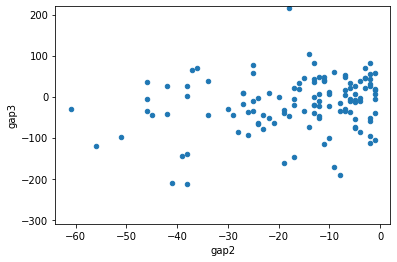

In [26]:
df_plot = gap20[(gap20['gap2'] < 0) & (gap20['gap'] > 0)]
var = 'gap2'
data = pd.concat([df_plot['gap3'], df_plot[var]], axis=1)
data.plot.scatter(x=var, y='gap3', ylim=(-310,220));

In [65]:
gap20['gap2'] = gap20['Close'].shift(0) - gap20['Close'].shift(1)
gap20['gap2'] = gap20['gap2'].shift(-1)
gap20 = gap20[(gap20.index.minute == 45) & (gap20.index.hour == 8)].dropna()
gap20.head()

C:\Users\Drey\anaconda3\envs\finlab\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Drey\anaconda3\envs\finlab\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Open,Close,gap,gap2
Datetime,,,,
2018-01-03 08:45:00,10748.0,10739.0,39.0,50.0
2018-01-04 08:45:00,10831.0,10827.0,42.0,10.0
2018-01-05 08:45:00,10838.0,10846.0,1.0,11.0
2018-01-08 08:45:00,10886.0,10880.0,29.0,6.0
2018-01-09 08:45:00,10889.0,10884.0,3.0,-3.0


In [71]:
gap20.describe()

,Open,Close,gap,gap2
count,410.000000,410.000000,410.000000,410.000000
mean,10539.173171,10539.787805,-1.485366,-1.165854
std,451.492458,451.694724,72.215827,65.168856
min,9367.000000,9380.000000,-434.000000,-308.000000
25%,10326.250000,10338.750000,-29.000000,-37.750000
50%,10668.500000,10668.000000,9.000000,5.500000
75%,10879.750000,10885.500000,37.000000,39.000000
max,11245.000000,11247.000000,220.000000,217.000000


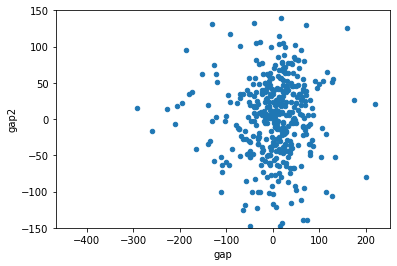

In [68]:
#scatter plot grlivarea/saleprice
var = 'gap'
data = pd.concat([gap20['gap2'], gap20[var]], axis=1)
data.plot.scatter(x=var, y='gap2', ylim=(-150,150));

In [72]:
gap20_positive = gap20[gap20['gap'] > 0]
gap20_positive.describe()

,Open,Close,gap,gap2
count,234.000000,234.000000,234.000000,234.000000
mean,10561.897436,10562.615385,41.435897,0.935897
std,448.770163,449.458918,35.465122,62.550101
min,9523.000000,9526.000000,1.000000,-213.000000
25%,10369.750000,10371.250000,16.000000,-35.000000
50%,10698.500000,10709.500000,31.000000,6.000000
75%,10897.500000,10897.000000,58.750000,42.000000
max,11245.000000,11247.000000,220.000000,217.000000


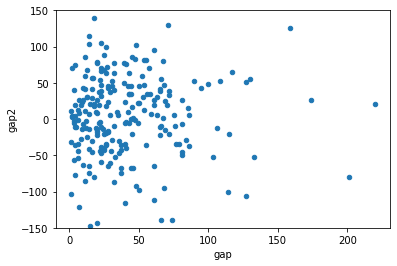

In [73]:
var = 'gap'
data = pd.concat([gap20_positive['gap2'], gap20_positive[var]], axis=1)
data.plot.scatter(x=var, y='gap2', ylim=(-150,150));

In [78]:
gap20_positive.head()

,Open,Close,gap,gap2
Datetime,,,,
2018-01-03 08:45:00,10748.0,10739.0,39.0,50.0
2018-01-04 08:45:00,10831.0,10827.0,42.0,10.0
2018-01-05 08:45:00,10838.0,10846.0,1.0,11.0
2018-01-08 08:45:00,10886.0,10880.0,29.0,6.0
2018-01-09 08:45:00,10889.0,10884.0,3.0,-3.0


In [79]:
gap2019 = gap20[(gap20.index.year > 2018)].dropna()

In [88]:
gap2019[gap2019['gap'] < 0].describe()

,Open,Close,gap,gap2
count,73.000000,73.000000,73.000000,73.000000
mean,10446.726027,10448.164384,-48.219178,1.726027
std,347.789937,345.212576,55.889585,57.104500
min,9367.000000,9380.000000,-283.000000,-208.000000
25%,10272.000000,10275.000000,-56.000000,-37.000000
50%,10493.000000,10497.000000,-30.000000,9.000000
75%,10686.000000,10694.000000,-12.000000,36.000000
max,10990.000000,10991.000000,-1.000000,204.000000


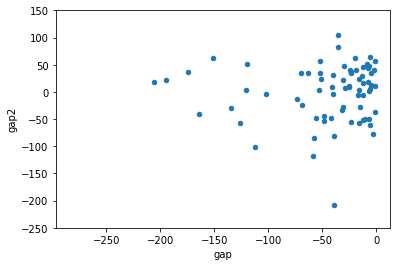

In [90]:
df_plot = gap2019[gap2019['gap'] < 0]
var = 'gap'
data = pd.concat([df_plot['gap2'], df_plot[var]], axis=1)
data.plot.scatter(x=var, y='gap2', ylim=(-250,150));

In [87]:
gap2019[gap2019['gap2'] == -211]

,Open,Close,gap,gap2
Datetime,,,,
2019-01-02 08:45:00,9760.0,9747.0,89.0,-211.0
